# Regular/irregular LDPC

Comparison between two types of LDPC code generation (Gallagher's and MacKey's approach)

In [1]:
import sys
sys.path.insert(0, '../../src')

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time


from LDPC import LDPC

In [ ]:
n = 266
d_v = 10
d_c = 14

In [ ]:
T2 = []
E2 = []

# irregular LDPC
for i in range(50):   
    ldpc = LDPC.from_params(n, d_v, d_c, regular=False)
    
    start = time.time()
    e = ldpc.guess_code_max_error(confidence=0.97)
    end = time.time()
    
    t = end - start
    
    T2.append(t)
    E2.append(e)
    
    print("{}: {}".format(i, e))

In [12]:
print(E2)

[8, 7, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 7, 7, 7, 8, 8, 6, 8, 8, 8, 7, 8, 7, 7, 8, 7, 7, 7, 7, 8, 8, 8, 8, 8, 7, 8, 8, 7, 7, 7, 7, 6, 8, 7, 8, 7, 5, 7, 8]


In [ ]:
T1 = []
E1 = []

# regular LDPC
for i in range(50):   
    ldpc = LDPC.from_params(n, d_v, d_c)
    
    start = time.time()
    e = ldpc.guess_code_max_error(confidence=0.97)
    end = time.time()
    
    t = end - start
    
    T1.append(t)
    E1.append(e)
    
    print("{}: {}".format(i, e))

In [14]:
print(E1)

[10, 10, 10, 9, 10, 10, 10, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 10, 11, 10, 10, 10, 10, 11, 9, 10, 11, 10, 10, 10, 10, 10, 10, 10, 9, 9, 10, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


--- Regular LDPC ---
Mean is 10.0
E is 10.0
STD is 0.4472135954999579

--- Irregular LDPC ---
Mean is 7.44
E is 7.44
STD is 0.6974238309665077


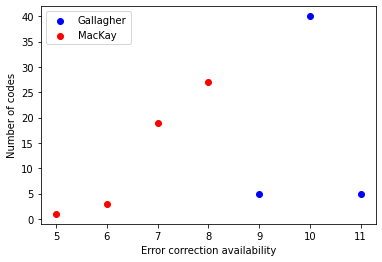

In [27]:
E1 = [10, 10, 10, 9, 10, 10, 10, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 10, 11, 10, 10, 10, 10, 11, 9, 10, 11, 10, 10, 10, 10, 10, 10, 10, 9, 9, 10, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
E2 = [8, 7, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 7, 7, 7, 8, 8, 6, 8, 8, 8, 7, 8, 7, 7, 8, 7, 7, 7, 7, 8, 8, 8, 8, 8, 7, 8, 8, 7, 7, 7, 7, 6, 8, 7, 8, 7, 5, 7, 8]

from collections import Counter

c1 = Counter(E1)
c2 = Counter(E2)

items1 = list(c1.items())
data1 = np.array(items1, dtype=int).T

items2 = list(c2.items())
data2 = np.array(items2, dtype=int).T

print("--- Regular LDPC ---")
print("Mean is", np.mean(E1))
print("E is", np.average(E1))
print("STD is", np.std(E1))

print()

print("--- Irregular LDPC ---")
print("Mean is", np.mean(E2))
print("E is", np.average(E2))
print("STD is", np.std(E2))

plt.xlabel('Error correction availability')
plt.ylabel('Number of codes')

plt.scatter(*data1, c='b', label='Gallagher')
plt.scatter(*data2, c='r', label='MacKay')

plt.legend(loc=2)